In [32]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
pd.options.display.max_rows

In [2]:
kp = pd.read_csv("/Users/caldavis/Documents/GitHub/Capstone-project/Data folder/KenPom Team Metrics.csv")
#kp.head(10)
kp_conf_rat = pd.read_csv("/Users/caldavis/Documents/GitHub/Capstone-project/Data folder/KP_Conf_Ratings.csv")
kp_conf_rat = kp_conf_rat[["Year_Conf", "Conf_Abb", "Conf_Rk", "Conf_Full", "Conf_Rating"]]
kp_conf_rat.head(10)

,Year_Conf,Conf_Abb,Conf_Rk,Conf_Full,Conf_Rating
0,2023,Big 12,1,Big 12 Conference,17.99
1,2023,Big Ten,2,Big Ten Conference,14.88
2,2023,Big East,3,Big East Conference,13.95
3,2023,SEC,4,Southeastern Conference,12.57
4,2023,Pac-12,5,Pac 12 Conference,11.58
5,2023,MWC,6,Mountain West Conference,9.26
6,2023,ACC,7,Atlantic Coast Conference,8.58
7,2023,AAC,8,American Athletic Conference,6.72
8,2023,WCC,9,West Coast Conference,6.27
9,2023,CUSA,10,Conference USA,3.60


In [3]:
d = pd.read_csv("/Users/caldavis/Documents/GitHub/Capstone-project/Data folder/final_data_by_player_type.csv")
d = pd.merge(d, kp, left_on=['Team', 'year'], right_on=['TeamName', 'Season'], how='left')
d = pd.merge(d, kp, left_on=['Team_n1', 'year'], right_on=['TeamName', 'Season'], how='left')
df = pd.merge(d, kp, left_on=['Team_n1', 'year_n1'], right_on=['TeamName', 'Season'], how='left')
df = pd.merge(df, kp_conf_rat, left_on=['conf_abbr', 'year'], right_on=['Conf_Abb', 'Year_Conf'], how='left')
df = pd.merge(df, kp_conf_rat, left_on=['conf_abbr_n1', 'year'], right_on=['Conf_Abb', 'Year_Conf'], how='left')
df = pd.merge(df, kp_conf_rat, left_on=['conf_abbr_n1', 'year_n1'], right_on=['Conf_Abb', 'Year_Conf'], how='left')
df = df.replace(to_replace="NO IDEA", value=0)
df = df.replace(to_replace="---", value=0)
df = df.fillna(0)
pd.options.display.max_columns
#pd.options.display.max_rows
df



/var/folders/cq/16hkxgp926d466c0g9jzx2900000gq/T/ipykernel_1642/1518560658.py:1: DtypeWarning: Columns (13,16,38,144,147,169) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv("/Users/caldavis/Documents/GitHub/Capstone-project/Data folder/final_data_by_player_type.csv")


,Unnamed: 0,player_type,Team,Team_n1,Unnamed..0_x,Player.Name,season,conf_abbr,games,games_started,...,Year_Conf_y,Conf_Abb_y,Conf_Rk_y,Conf_Full_y,Conf_Rating_y,Year_Conf,Conf_Abb,Conf_Rk,Conf_Full,Conf_Rating
0,1,1,JACKSONVILLE,JACKSONVILLE,16199.0,aamahne-santos-1,2018-19,A-Sun,32,31,...,2019.0,A-Sun,20.0,ASUN Conference,-4.43,2020.0,A-Sun,26.0,ASUN Conference,-8.16
1,2,1,CLEMSON,CLEMSON,7084.0,aamir-simms-1,2018-19,ACC,34,34,...,2019.0,ACC,3.0,Atlantic Coast Conference,15.33,2020.0,ACC,4.0,Atlantic Coast Conference,11.45
2,3,1,CLEMSON,CLEMSON,7085.0,aamir-simms-1,2019-20,ACC,30,30,...,2020.0,ACC,4.0,Atlantic Coast Conference,11.45,2021.0,ACC,5.0,Atlantic Coast Conference,13.22
3,4,1,NORTH DAKOTA,NORTH DAKOTA,0.0,aanen-moody-1,2018-19,Summit,30,0,...,2019.0,Summit,23.0,Summit League,-5.49,2020.0,Summit,19.0,Summit League,-3.53
4,5,0,NORTH DAKOTA,SOUTHERN UTAH,0.0,aanen-moody-1,2019-20,Summit,9,0,...,2020.0,Big Sky,17.0,Big Sky Conference,-2.26,2021.0,Big Sky,18.0,Big Sky Conference,-4.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,11038,1,NORTHERN ILLINOIS,NORTHERN ILLINOIS,23247.0,zool-kueth-1,2020-21,MAC,32,4,...,2021.0,MAC,12.0,Mid American Conference,1.22,2022.0,MAC,20.0,Mid American Conference,-5.45
11038,11039,0,NORTHERN ILLINOIS,TENNESSEE STATE,23248.0,zool-kueth-1,2021-22,MAC,80,18,...,2022.0,OVC,23.0,Ohio Valley Conference,-6.46,2023.0,OVC,29.0,Ohio Valley Conference,-10.36
11039,11040,1,UC-RIVERSIDE,UC-RIVERSIDE,2036.0,zyon-pullin-1,2019-20,Big West,31,0,...,2020.0,Big West,20.0,Big West Conference,-5.07,2021.0,Big West,15.0,Big West Conference,-2.36
11040,11041,1,UC-RIVERSIDE,UC-RIVERSIDE,2037.0,zyon-pullin-1,2020-21,Big West,22,22,...,2021.0,Big West,15.0,Big West Conference,-2.36,2022.0,Big West,19.0,Big West Conference,-3.47


In [4]:
#df[(df['games']>39) | (df['games_n1']>39)]
df[((df['games']>39) & (df['year']==2023)) | ((df['games_n1']>39) & (df['year_n1']==2023)) | 
   ((df['games']>40) & (df['year']==2022)) | ((df['games_n1']>40) & (df['year_n1']==2022)) | 
   ((df['games']>33) & (df['year']==2021)) | ((df['games_n1']>33) & (df['year_n1']==2021)) | 
   ((df['games']>35) & (df['year']==2020)) | ((df['games_n1']>35) & (df['year_n1']==2020)) | 
   ((df['games']>40) & (df['year']==2019)) | ((df['games_n1']>40) & (df['year_n1']==2019))]

,Unnamed: 0,player_type,Team,Team_n1,Unnamed..0_x,Player.Name,season,conf_abbr,games,games_started,...,Year_Conf_y,Conf_Abb_y,Conf_Rk_y,Conf_Full_y,Conf_Rating_y,Year_Conf,Conf_Abb,Conf_Rk,Conf_Full,Conf_Rating
110,111,1,LITTLE ROCK,LITTLE ROCK,28303.0,admir-besovic-1,2020-21,Sun Belt,23,5,...,2021.0,Sun Belt,21.0,Sun Belt Conference,-6.02,2022.0,Sun Belt,17.0,Sun Belt Conference,-2.32
112,113,1,NORTHERN ILLINOIS,NORTHERN ILLINOIS,12749.0,adong-makuoi-1,2020-21,MAC,32,32,...,2021.0,MAC,12.0,Mid American Conference,1.22,2022.0,MAC,20.0,Mid American Conference,-5.45
113,114,0,NORTHERN ILLINOIS,TENNESSEE STATE,12750.0,adong-makuoi-1,2021-22,MAC,79,71,...,2022.0,OVC,23.0,Ohio Valley Conference,-6.46,2023.0,OVC,29.0,Ohio Valley Conference,-10.36
139,140,1,CANISIUS,CANISIUS,13155.0,ahamadou-fofana-1,2020-21,MAAC,25,25,...,2021.0,MAAC,27.0,Metro Atlantic Athletic Conference,-8.40,2022.0,MAAC,16.0,Metro Atlantic Athletic Conference,-2.19
140,141,0,CANISIUS,MARYLAND-EASTERN SHORE,13156.0,ahamadou-fofana-1,2021-22,MAAC,68,62,...,2022.0,MEAC,30.0,Mid-Eastern Athletic Conference,-10.93,2023.0,MEAC,28.0,Mid-Eastern Athletic Conference,-9.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10982,10983,0,NEW MEXICO,TOWSON,10133.0,zane-martin-1,2019-20,MWC,15,15,...,2020.0,CAA,18.0,Colonial Athletic Association,-3.35,2021.0,CAA,19.0,Colonial Athletic Association,-5.06
11001,11002,0,TULSA,SIU-EDWARDSVILLE,7122.0,zeke-moore-1,2018-19,AAC,31,30,...,2019.0,OVC,25.0,Ohio Valley Conference,-5.98,2020.0,OVC,29.0,Ohio Valley Conference,-9.67
11027,11028,1,MARYLAND-EASTERN SHORE,MARYLAND-EASTERN SHORE,8648.0,zion-styles-1,2021-22,MEAC,53,41,...,2022.0,MEAC,30.0,Mid-Eastern Athletic Conference,-10.93,2023.0,MEAC,28.0,Mid-Eastern Athletic Conference,-9.72
11037,11038,1,NORTHERN ILLINOIS,NORTHERN ILLINOIS,23247.0,zool-kueth-1,2020-21,MAC,32,4,...,2021.0,MAC,12.0,Mid American Conference,1.22,2022.0,MAC,20.0,Mid American Conference,-5.45


array([[<Axes: title={'center': 'games'}>]], dtype=object)

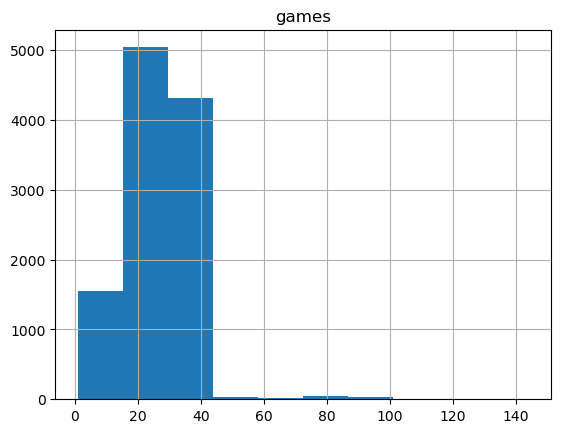

In [5]:
games_df = pd.DataFrame(zip(df.games), columns=['games'])
games_df
df.hist(column='games')


In [6]:
team_df = df[["Team", "Team_n1"]]
team_df_n = team_df[["Team"]]
team_df_n = team_df_n.sort_values(by=["Team"])

team_df_n1 = team_df[["Team_n1"]]
team_df_n1 = team_df_n1.sort_values(by=["Team_n1"])

#print(len(team_df.Team.unique()))
#print(list(team_df_n1.Team_n1.unique()))

In [7]:
# Converts to numeric
df[['games', 'games_started', 'mp_per_g', 'fg_per_g', 'fga_per_g', 'fg_pct', 'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct', 'ft_per_g', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'sos', 'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg2_pct.1', 'fg3', 'fg3a', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'fg_per_min', 'fga_per_min', 'fg2_per_min', 'fg2a_per_min', 'fg3_per_min', 'fg3a_per_min', 'ft_per_min', 'fta_per_min', 'trb_per_min', 'ast_per_min', 'stl_per_min', 'blk_per_min', 'tov_per_min', 'pf_per_min', 'pts_per_min', 'fg_per_poss', 'fga_per_poss', 'fg2_per_poss', 'fg2a_per_poss', 'fg3_per_poss', 'fg3a_per_poss', 'ft_per_poss', 'fta_per_poss', 'trb_per_poss', 'ast_per_poss', 'stl_per_poss', 'blk_per_poss', 'tov_per_poss', 'pf_per_poss', 'pts_per_poss', 'off_rtg', 'def_rtg', 'per', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'pprod', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws', 'ws_per_40', 'obpm', 'dbpm', 'bpm', 'year', 'Ht', 'Wt', 'G', 'S', 'X.Min', 'ORtg', 'X.Poss', 'X.Shots', 'games_n1', 'games_started_n1', 'mp_per_g_n1', 'fg_per_g_n1', 'fga_per_g_n1', 'fg_pct_n1', 'fg2_per_g_n1', 'fg2a_per_g_n1', 'fg2_pct_n1', 'fg3_per_g_n1', 'fg3a_per_g_n1', 'fg3_pct_n1', 'ft_per_g_n1', 'fta_per_g_n1', 'ft_pct_n1', 'orb_per_g_n1', 'drb_per_g_n1', 'trb_per_g_n1', 'ast_per_g_n1', 'stl_per_g_n1', 'blk_per_g_n1', 'tov_per_g_n1', 'pf_per_g_n1', 'pts_per_g_n1', 'sos_n1', 'mp_n1', 'fg_n1', 'fga_n1', 'fg2_n1', 'fg2a_n1', 'fg2_pct.1_n1', 'fg3_n1', 'fg3a_n1', 'ft_n1', 'fta_n1', 'orb_n1', 'drb_n1', 'trb_n1', 'ast_n1', 'stl_n1', 'blk_n1', 'tov_n1', 'pf_n1', 'pts_n1', 'fg_per_min_n1', 'fga_per_min_n1', 'fg2_per_min_n1', 'fg2a_per_min_n1', 'fg3_per_min_n1', 'fg3a_per_min_n1', 'ft_per_min_n1', 'fta_per_min_n1', 'trb_per_min_n1', 'ast_per_min_n1', 'stl_per_min_n1', 'blk_per_min_n1', 'tov_per_min_n1', 'pf_per_min_n1', 'pts_per_min_n1', 'fg_per_poss_n1', 'fga_per_poss_n1', 'fg2_per_poss_n1', 'fg2a_per_poss_n1', 'fg3_per_poss_n1', 'fg3a_per_poss_n1', 'ft_per_poss_n1', 'fta_per_poss_n1', 'trb_per_poss_n1', 'ast_per_poss_n1', 'stl_per_poss_n1', 'blk_per_poss_n1', 'tov_per_poss_n1', 'pf_per_poss_n1', 'pts_per_poss_n1', 'off_rtg_n1', 'def_rtg_n1', 'per_n1', 'ts_pct_n1', 'efg_pct_n1', 'fg3a_per_fga_pct_n1', 'fta_per_fga_pct_n1', 'pprod_n1', 'orb_pct_n1', 'drb_pct_n1', 'trb_pct_n1', 'ast_pct_n1', 'stl_pct_n1', 'blk_pct_n1', 'tov_pct_n1', 'usg_pct_n1', 'ows_n1', 'dws_n1', 'ws_n1', 'ws_per_40_n1', 'obpm_n1', 'dbpm_n1', 'bpm_n1', 'year_n1', 'Ht_n1', 'Wt_n1', 'G_n1', 'S_n1', 'X.Min_n1', 'ORtg_n1', 'X.Poss_n1', 'X.Shots_n1']] = df[['games', 'games_started', 'mp_per_g', 'fg_per_g', 'fga_per_g', 'fg_pct', 'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct', 'ft_per_g', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'sos', 'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg2_pct.1', 'fg3', 'fg3a', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'fg_per_min', 'fga_per_min', 'fg2_per_min', 'fg2a_per_min', 'fg3_per_min', 'fg3a_per_min', 'ft_per_min', 'fta_per_min', 'trb_per_min', 'ast_per_min', 'stl_per_min', 'blk_per_min', 'tov_per_min', 'pf_per_min', 'pts_per_min', 'fg_per_poss', 'fga_per_poss', 'fg2_per_poss', 'fg2a_per_poss', 'fg3_per_poss', 'fg3a_per_poss', 'ft_per_poss', 'fta_per_poss', 'trb_per_poss', 'ast_per_poss', 'stl_per_poss', 'blk_per_poss', 'tov_per_poss', 'pf_per_poss', 'pts_per_poss', 'off_rtg', 'def_rtg', 'per', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'pprod', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws', 'ws_per_40', 'obpm', 'dbpm', 'bpm', 'year', 'Ht', 'Wt', 'G', 'S', 'X.Min', 'ORtg', 'X.Poss', 'X.Shots', 'games_n1', 'games_started_n1', 'mp_per_g_n1', 'fg_per_g_n1', 'fga_per_g_n1', 'fg_pct_n1', 'fg2_per_g_n1', 'fg2a_per_g_n1', 'fg2_pct_n1', 'fg3_per_g_n1', 'fg3a_per_g_n1', 'fg3_pct_n1', 'ft_per_g_n1', 'fta_per_g_n1', 'ft_pct_n1', 'orb_per_g_n1', 'drb_per_g_n1', 'trb_per_g_n1', 'ast_per_g_n1', 'stl_per_g_n1', 'blk_per_g_n1', 'tov_per_g_n1', 'pf_per_g_n1', 'pts_per_g_n1', 'sos_n1', 'mp_n1', 'fg_n1', 'fga_n1', 'fg2_n1', 'fg2a_n1', 'fg2_pct.1_n1', 'fg3_n1', 'fg3a_n1', 'ft_n1', 'fta_n1', 'orb_n1', 'drb_n1', 'trb_n1', 'ast_n1', 'stl_n1', 'blk_n1', 'tov_n1', 'pf_n1', 'pts_n1', 'fg_per_min_n1', 'fga_per_min_n1', 'fg2_per_min_n1', 'fg2a_per_min_n1', 'fg3_per_min_n1', 'fg3a_per_min_n1', 'ft_per_min_n1', 'fta_per_min_n1', 'trb_per_min_n1', 'ast_per_min_n1', 'stl_per_min_n1', 'blk_per_min_n1', 'tov_per_min_n1', 'pf_per_min_n1', 'pts_per_min_n1', 'fg_per_poss_n1', 'fga_per_poss_n1', 'fg2_per_poss_n1', 'fg2a_per_poss_n1', 'fg3_per_poss_n1', 'fg3a_per_poss_n1', 'ft_per_poss_n1', 'fta_per_poss_n1', 'trb_per_poss_n1', 'ast_per_poss_n1', 'stl_per_poss_n1', 'blk_per_poss_n1', 'tov_per_poss_n1', 'pf_per_poss_n1', 'pts_per_poss_n1', 'off_rtg_n1', 'def_rtg_n1', 'per_n1', 'ts_pct_n1', 'efg_pct_n1', 'fg3a_per_fga_pct_n1', 'fta_per_fga_pct_n1', 'pprod_n1', 'orb_pct_n1', 'drb_pct_n1', 'trb_pct_n1', 'ast_pct_n1', 'stl_pct_n1', 'blk_pct_n1', 'tov_pct_n1', 'usg_pct_n1', 'ows_n1', 'dws_n1', 'ws_n1', 'ws_per_40_n1', 'obpm_n1', 'dbpm_n1', 'bpm_n1', 'year_n1', 'Ht_n1', 'Wt_n1', 'G_n1', 'S_n1', 'X.Min_n1', 'ORtg_n1', 'X.Poss_n1', 'X.Shots_n1']].apply(pd.to_numeric, errors="ignore")


In [8]:
conditions = [(df['X.Poss_n1']>=28.0), (df['X.Poss_n1']>=24.0), (df['X.Poss_n1']>=20.0), (df['X.Poss_n1']>=16), 
              (df['X.Poss_n1']>=12.0), (df['X.Poss_n1']<=12) & (df['X.Min_n1']>=10.0), (df['X.Min_n1']<10)]
#values = ['Go-To Guy', 'Major Contributor', 'Significant Contributor', 'Role Players', 'Limited Role', 'Nearly Invisible', 'Bench Warmer']
values = [0, 1, 2, 3, 4, 5, 6]
df['Contribution_n1'] = np.select(conditions, values)

/var/folders/cq/16hkxgp926d466c0g9jzx2900000gq/T/ipykernel_1642/1823136958.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Contribution_n1'] = np.select(conditions, values)


In [9]:
df_redshirt = df.loc[(df['games']<=10) & (df['games_started']/df['games']>=0.7)]
#& (df.games_started/df.games>=0.7)]
df_redshirt

,Unnamed: 0,player_type,Team,Team_n1,Unnamed..0_x,Player.Name,season,conf_abbr,games,games_started,...,Conf_Abb_y,Conf_Rk_y,Conf_Full_y,Conf_Rating_y,Year_Conf,Conf_Abb,Conf_Rk,Conf_Full,Conf_Rating,Contribution_n1
14,15,0,SOUTHERN ILLINOIS,GONZAGA,0.0,aaron-cook-2,2019-20,MVC,6,6,...,WCC,8.0,West Coast Conference,5.29,2021.0,WCC,8.0,West Coast Conference,7.78,3
187,188,1,TOLEDO,TOLEDO,23531.0,aj-edu-1,2020-21,MAC,2,2,...,MAC,12.0,Mid American Conference,1.22,2023.0,MAC,19.0,Mid American Conference,-3.71,4
191,192,1,NORTHERN IOWA,NORTHERN IOWA,801.0,aj-green-1,2020-21,MVC,3,3,...,0,0.0,0,0.00,0.0,0,0.0,0,0.00,1
251,252,0,SOUTH CAROLINA,EAST CAROLINA,21092.0,alanzo-frink-1,2020-21,SEC,3,3,...,AAC,7.0,American Athletic Conference,8.02,2022.0,AAC,8.0,American Athletic Conference,7.00,2
423,424,0,GEORGIA,JACKSONVILLE STATE,17390.0,amanze-ngumezi-1,2019-20,SEC,7,7,...,OVC,29.0,Ohio Valley Conference,-9.67,2021.0,OVC,22.0,Ohio Valley Conference,-6.98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10167,10168,1,DRAKE,DRAKE,0.0,tremell-murphy-2,2019-20,MVC,5,5,...,0,0.0,0,0.00,0.0,0,0.0,0,0.00,3
10518,10519,1,TEXAS STATE,TEXAS STATE,13561.0,tyrel-morgan-1,2021-22,Sun Belt,2,2,...,Sun Belt,17.0,Sun Belt Conference,-2.32,2023.0,Sun Belt,14.0,Sun Belt Conference,0.09,3
10546,10547,1,VANDERBILT,VANDERBILT,3639.0,tyrin-lawrence-1,2020-21,SEC,7,5,...,SEC,4.0,Southeastern Conference,14.32,2022.0,SEC,2.0,Southeastern Conference,14.46,3
10594,10595,1,KANSAS,KANSAS,5409.0,udoka-azubuike-1,2018-19,Big 12,9,9,...,Big 12,1.0,Big 12 Conference,17.68,2020.0,Big 12,2.0,Big 12 Conference,15.73,2


In [10]:
#df = df.drop(df[(df['games']<=12) & (df['games_started']/df['games']>=0.6)].index)
df['Year_dif'] = df['year_n1']-df['year']
df['Team_AdjEM_dif'] = df['AdjEM_y']-df['AdjEM_x']
df['KP_Rk_Dif'] = df['RankAdjEM_y']-df['RankAdjEM_x']
df['Calc A'] = df['X.Min']*df['ORtg']
# Trying to flag red 
df_test1 = df[['player_type', 'X.Poss', 'X.Poss_n1', 'X.Min',
                'X.Min_n1', 'ORtg', 'Contribution_n1', 'Year_dif', 'stl_per_poss', 
                'blk_per_poss', 'DR.', 'KP_Rk_Dif', 'Calc A']]
#'Team_AdjEM_dif'
X = df_test1[['player_type', 'X.Poss', 'X.Min', 'X.Min_n1', 'ORtg', 
                      'Year_dif', 'stl_per_poss', 'blk_per_poss', 
                      'DR.', 'KP_Rk_Dif', 'Calc A']]
y = df_test1[['Contribution_n1']]

/var/folders/cq/16hkxgp926d466c0g9jzx2900000gq/T/ipykernel_1642/3416284705.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Year_dif'] = df['year_n1']-df['year']
/var/folders/cq/16hkxgp926d466c0g9jzx2900000gq/T/ipykernel_1642/3416284705.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Team_AdjEM_dif'] = df['AdjEM_y']-df['AdjEM_x']
/var/folders/cq/16hkxgp926d466c0g9jzx2900000gq/T/ipykernel_1642/3416284705.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

In [11]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [12]:
print(len(y))
print(len(X_train), " ", len(X_test))

11042
7398   3644


In [13]:
model = XGBClassifier()
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 40.61%


In [14]:
#y_test_df = pd.DataFrame({"Contribution_n1": y_test})
y_test["Predictions"]=y_pred
y_test["Better"] = np.where(y_test['Predictions']<=y_test['Contribution_n1'], 1, 0)
#y_test["Spot On"] = np.where(y_test['Predictions']==y_test['Contribution_n1'], 1, 0)
y_test["Worse"] = np.where(y_test['Predictions']>y_test['Contribution_n1'], 1, 0)
print(sum(list(y_test['Better'])))
print(len(list(y_test['Better'])))
print(round(sum(list(y_test['Better']))/len(list(y_test['Better'])), 2))
#y_test["Difference"] = y_test['Predictions']-y_test['Contribution_n1']
cond = y_test.groupby("Predictions").sum()
cond2 = y_test.groupby(["Contribution_n1", "Predictions"]).count()
cond2


NameError: name 'y_pred' is not defined

In [ ]:
cond

,Contribution_n1,Better,Worse
Predictions,,,
0,70,84,0
1,523,298,58
2,1831,651,203
3,4084,965,422
4,2772,418,346
5,541,58,70
6,303,26,45


In [ ]:
#frames = [y_test, pred_df]
#comp = pd.concat([y_test, pred_df])
#comp

Transfer Models

In [ ]:
df_transfer = df[df['player_type']==0]
#df_transfer['Year_dif'] = df_transfer['year_n1']-df_transfer['year']
#df_transfer
df_test_transfer = df_transfer[['player_type', 'X.Poss', 'X.Poss_n1', 'X.Min',
                'X.Min_n1', 'ORtg', 'Contribution_n1', 'Year_dif', 'stl_per_poss', 
                'blk_per_poss', 'DR.', 'AdjEM_x']]
Xt = df_test_transfer[['X.Poss', 'X.Min', 'X.Min_n1', 'ORtg', 
                      'Year_dif', 'stl_per_poss', 'blk_per_poss', 
                      'DR.', 'AdjEM_x']]
yt = df_test_transfer[['Contribution_n1']]

In [ ]:
seed = 7
test_size = 0.33
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=test_size, random_state=seed)

In [ ]:
model = XGBClassifier()
model.fit(Xt_train, yt_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
yt_pred = model.predict(Xt_test)
predictionst = [round(value) for value in yt_pred]
accuracyt = accuracy_score(yt_test, predictionst)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 40.61%


In [ ]:
df.Yr_n1.unique()

array(['Sr', 'Jr', 'So', 'Fr'], dtype=object)

In [ ]:
new = pd.DataFrame(zip(df.Ht), columns=['Ht'])
ht_df = new.groupby(['Ht']).size()
ht_df

Ht
62       2
66       5
67      13
68      40
69      59
70     124
71     172
72     471
73     594
74     822
75    1024
76    1107
77    1200
78    1093
79    1215
80    1103
81     921
82     581
83     262
84     139
85      68
86      11
87      10
88       5
89       1
dtype: int64

In [ ]:
new1 = pd.DataFrame(zip(df.Wt), columns=['Wt'])
wt_df = new1.groupby(['Wt']).size()
wt_df

Wt
0.0      108
139.0      1
140.0     10
145.0     13
148.0      1
        ... 
295.0      5
299.0      1
300.0      6
305.0      2
350.0      1
Length: 135, dtype: int64

In [79]:
# All In One Go

# Prep initial df
d = pd.read_csv("/Users/caldavis/Documents/GitHub/Capstone-project/Data folder/final_data_by_player_type.csv")
d = pd.merge(d, kp, left_on=['Team', 'year'], right_on=['TeamName', 'Season'], how='left')
d = pd.merge(d, kp, left_on=['Team_n1', 'year'], right_on=['TeamName', 'Season'], how='left')
df = pd.merge(d, kp, left_on=['Team_n1', 'year_n1'], right_on=['TeamName', 'Season'], how='left')
df = pd.merge(df, kp_conf_rat, left_on=['conf_abbr', 'year'], right_on=['Conf_Abb', 'Year_Conf'], how='left')
df = pd.merge(df, kp_conf_rat, left_on=['conf_abbr_n1', 'year'], right_on=['Conf_Abb', 'Year_Conf'], how='left')
df = pd.merge(df, kp_conf_rat, left_on=['conf_abbr_n1', 'year_n1'], right_on=['Conf_Abb', 'Year_Conf'], how='left')
df = df.replace(to_replace="NO IDEA", value=0)
df = df.replace(to_replace="---", value=0)
df = df.fillna(0)

# Convert to Numeric
df[['games', 'games_started', 'mp_per_g', 'fg_per_g', 'fga_per_g', 'fg_pct', 'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct', 'ft_per_g', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'sos', 'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg2_pct.1', 'fg3', 'fg3a', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'fg_per_min', 'fga_per_min', 'fg2_per_min', 'fg2a_per_min', 'fg3_per_min', 'fg3a_per_min', 'ft_per_min', 'fta_per_min', 'trb_per_min', 'ast_per_min', 'stl_per_min', 'blk_per_min', 'tov_per_min', 'pf_per_min', 'pts_per_min', 'fg_per_poss', 'fga_per_poss', 'fg2_per_poss', 'fg2a_per_poss', 'fg3_per_poss', 'fg3a_per_poss', 'ft_per_poss', 'fta_per_poss', 'trb_per_poss', 'ast_per_poss', 'stl_per_poss', 'blk_per_poss', 'tov_per_poss', 'pf_per_poss', 'pts_per_poss', 'off_rtg', 'def_rtg', 'per', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'pprod', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws', 'ws_per_40', 'obpm', 'dbpm', 'bpm', 'year', 'Ht', 'Wt', 'G', 'S', 'X.Min', 'ORtg', 'X.Poss', 'X.Shots', 'games_n1', 'games_started_n1', 'mp_per_g_n1', 'fg_per_g_n1', 'fga_per_g_n1', 'fg_pct_n1', 'fg2_per_g_n1', 'fg2a_per_g_n1', 'fg2_pct_n1', 'fg3_per_g_n1', 'fg3a_per_g_n1', 'fg3_pct_n1', 'ft_per_g_n1', 'fta_per_g_n1', 'ft_pct_n1', 'orb_per_g_n1', 'drb_per_g_n1', 'trb_per_g_n1', 'ast_per_g_n1', 'stl_per_g_n1', 'blk_per_g_n1', 'tov_per_g_n1', 'pf_per_g_n1', 'pts_per_g_n1', 'sos_n1', 'mp_n1', 'fg_n1', 'fga_n1', 'fg2_n1', 'fg2a_n1', 'fg2_pct.1_n1', 'fg3_n1', 'fg3a_n1', 'ft_n1', 'fta_n1', 'orb_n1', 'drb_n1', 'trb_n1', 'ast_n1', 'stl_n1', 'blk_n1', 'tov_n1', 'pf_n1', 'pts_n1', 'fg_per_min_n1', 'fga_per_min_n1', 'fg2_per_min_n1', 'fg2a_per_min_n1', 'fg3_per_min_n1', 'fg3a_per_min_n1', 'ft_per_min_n1', 'fta_per_min_n1', 'trb_per_min_n1', 'ast_per_min_n1', 'stl_per_min_n1', 'blk_per_min_n1', 'tov_per_min_n1', 'pf_per_min_n1', 'pts_per_min_n1', 'fg_per_poss_n1', 'fga_per_poss_n1', 'fg2_per_poss_n1', 'fg2a_per_poss_n1', 'fg3_per_poss_n1', 'fg3a_per_poss_n1', 'ft_per_poss_n1', 'fta_per_poss_n1', 'trb_per_poss_n1', 'ast_per_poss_n1', 'stl_per_poss_n1', 'blk_per_poss_n1', 'tov_per_poss_n1', 'pf_per_poss_n1', 'pts_per_poss_n1', 'off_rtg_n1', 'def_rtg_n1', 'per_n1', 'ts_pct_n1', 'efg_pct_n1', 'fg3a_per_fga_pct_n1', 'fta_per_fga_pct_n1', 'pprod_n1', 'orb_pct_n1', 'drb_pct_n1', 'trb_pct_n1', 'ast_pct_n1', 'stl_pct_n1', 'blk_pct_n1', 'tov_pct_n1', 'usg_pct_n1', 'ows_n1', 'dws_n1', 'ws_n1', 'ws_per_40_n1', 'obpm_n1', 'dbpm_n1', 'bpm_n1', 'year_n1', 'Ht_n1', 'Wt_n1', 'G_n1', 'S_n1', 'X.Min_n1', 'ORtg_n1', 'X.Poss_n1', 'X.Shots_n1']] = df[['games', 'games_started', 'mp_per_g', 'fg_per_g', 'fga_per_g', 'fg_pct', 'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct', 'ft_per_g', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'sos', 'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg2_pct.1', 'fg3', 'fg3a', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'fg_per_min', 'fga_per_min', 'fg2_per_min', 'fg2a_per_min', 'fg3_per_min', 'fg3a_per_min', 'ft_per_min', 'fta_per_min', 'trb_per_min', 'ast_per_min', 'stl_per_min', 'blk_per_min', 'tov_per_min', 'pf_per_min', 'pts_per_min', 'fg_per_poss', 'fga_per_poss', 'fg2_per_poss', 'fg2a_per_poss', 'fg3_per_poss', 'fg3a_per_poss', 'ft_per_poss', 'fta_per_poss', 'trb_per_poss', 'ast_per_poss', 'stl_per_poss', 'blk_per_poss', 'tov_per_poss', 'pf_per_poss', 'pts_per_poss', 'off_rtg', 'def_rtg', 'per', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'pprod', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws', 'ws_per_40', 'obpm', 'dbpm', 'bpm', 'year', 'Ht', 'Wt', 'G', 'S', 'X.Min', 'ORtg', 'X.Poss', 'X.Shots', 'games_n1', 'games_started_n1', 'mp_per_g_n1', 'fg_per_g_n1', 'fga_per_g_n1', 'fg_pct_n1', 'fg2_per_g_n1', 'fg2a_per_g_n1', 'fg2_pct_n1', 'fg3_per_g_n1', 'fg3a_per_g_n1', 'fg3_pct_n1', 'ft_per_g_n1', 'fta_per_g_n1', 'ft_pct_n1', 'orb_per_g_n1', 'drb_per_g_n1', 'trb_per_g_n1', 'ast_per_g_n1', 'stl_per_g_n1', 'blk_per_g_n1', 'tov_per_g_n1', 'pf_per_g_n1', 'pts_per_g_n1', 'sos_n1', 'mp_n1', 'fg_n1', 'fga_n1', 'fg2_n1', 'fg2a_n1', 'fg2_pct.1_n1', 'fg3_n1', 'fg3a_n1', 'ft_n1', 'fta_n1', 'orb_n1', 'drb_n1', 'trb_n1', 'ast_n1', 'stl_n1', 'blk_n1', 'tov_n1', 'pf_n1', 'pts_n1', 'fg_per_min_n1', 'fga_per_min_n1', 'fg2_per_min_n1', 'fg2a_per_min_n1', 'fg3_per_min_n1', 'fg3a_per_min_n1', 'ft_per_min_n1', 'fta_per_min_n1', 'trb_per_min_n1', 'ast_per_min_n1', 'stl_per_min_n1', 'blk_per_min_n1', 'tov_per_min_n1', 'pf_per_min_n1', 'pts_per_min_n1', 'fg_per_poss_n1', 'fga_per_poss_n1', 'fg2_per_poss_n1', 'fg2a_per_poss_n1', 'fg3_per_poss_n1', 'fg3a_per_poss_n1', 'ft_per_poss_n1', 'fta_per_poss_n1', 'trb_per_poss_n1', 'ast_per_poss_n1', 'stl_per_poss_n1', 'blk_per_poss_n1', 'tov_per_poss_n1', 'pf_per_poss_n1', 'pts_per_poss_n1', 'off_rtg_n1', 'def_rtg_n1', 'per_n1', 'ts_pct_n1', 'efg_pct_n1', 'fg3a_per_fga_pct_n1', 'fta_per_fga_pct_n1', 'pprod_n1', 'orb_pct_n1', 'drb_pct_n1', 'trb_pct_n1', 'ast_pct_n1', 'stl_pct_n1', 'blk_pct_n1', 'tov_pct_n1', 'usg_pct_n1', 'ows_n1', 'dws_n1', 'ws_n1', 'ws_per_40_n1', 'obpm_n1', 'dbpm_n1', 'bpm_n1', 'year_n1', 'Ht_n1', 'Wt_n1', 'G_n1', 'S_n1', 'X.Min_n1', 'ORtg_n1', 'X.Poss_n1', 'X.Shots_n1']].apply(pd.to_numeric, errors="ignore")

# Add Contributions
conditions = [(df['X.Poss_n1']>=28.0), (df['X.Poss_n1']>=24.0), (df['X.Poss_n1']>=20.0), (df['X.Poss_n1']>=16), 
              (df['X.Poss_n1']>=12.0), (df['X.Poss_n1']<12)]
                                        #& (df['X.Min_n1']>=10.0))]
#(df['X.Min_n1']<10),
#values = ['Go-To Guy', 'Major Contributor', 'Significant Contributor', 'Role Players', 'Limited Role', 'Nearly Invisible', 'Bench Warmer']
values = [0, 1, 2, 3, 4, 5]
df['Contribution_n1'] = np.select(conditions, values)

# Add Year in School KP
year_cond = [(df['Yr_n1']=='Fr'), (df['Yr_n1']=='So'), 
             (df['Yr_n1']=='Jr'), (df['Yr_n1']=='Sr')]
year_val = [1, 2, 3, 4]
df['Class'] = np.select(year_cond, year_val)

# Add Ht. Categories
ht_cond = [(df['Ht']<=74), (df['Ht']>74) & (df['Ht']<=76), (df['Ht']>76) & (df['Ht']<=78),
           (df['Ht']>78) & (df['Ht']<=80), (df['Ht']>80)]

ht_val = [0, 1, 2, 3, 4]
df['Pos_Ht'] = np.select(ht_cond, ht_val)
#df[‘column’] =( df[‘column’] – df[‘column’].mean() ) / df[‘column’].std()


# Additional Features + Model Prep
df = df.drop(df[(df['games']<=14) & (df['games_started']/df['games']>0.25)].index)
df = df.drop(df[(df['games']<=3)].index)
df = df.drop(df.loc[((df['games']>39) & (df['year']==2023)) | ((df['games_n1']>39) & (df['year_n1']==2023)) | 
   ((df['games']>40) & (df['year']==2022)) | ((df['games_n1']>40) & (df['year_n1']==2022)) | 
   ((df['games']>33) & (df['year']==2021)) | ((df['games_n1']>33) & (df['year_n1']==2021)) | 
   ((df['games']>35) & (df['year']==2020)) | ((df['games_n1']>35) & (df['year_n1']==2020)) | 
   ((df['games']>40) & (df['year']==2019)) | ((df['games_n1']>40) & (df['year_n1']==2019)) |
   (df['year']==0)]['Player.Name'].index)
df = df.drop(df[(df['X.Min_n1']<=10)].index)
df['Year_dif'] = df['year_n1']-df['year']
df['Team_AdjEM_dif'] = df['AdjEM_y']-df['AdjEM_x']
df['KP_Rk_Dif'] = df['RankAdjEM_y']-df['RankAdjEM_x']
df['KP_Conf_Dif'] = df['Conf_Rating_y']-df['Conf_Rating_x']
df['Calc A'] = df['X.Min']*df['ORtg']
df['Calc A_n1'] =df['X.Min_n1']*df['ORtg_n1']
df['Calc B'] = (df['stl_per_poss']+df['blk_per_poss']+df['DR.'])*df['X.Min']
df['Calc B_n1'] = (df['stl_per_poss_n1']+df['blk_per_poss_n1']+df['DR._n1'])*df['X.Min_n1']
df['Calc Overall'] = df['Calc A'] + df['Calc B']
df['Calc Overall_n1'] = df['Calc A_n1'] + df['Calc B_n1']


# Calc_A_n1_cond = [(df['Calc A_n1']<=340), (df['Calc A_n1']>340) & (df['Calc A_n1']<=664), (df['Calc A_n1']>664) & (df['Calc A_n1']<=1010),
#            (df['Calc A_n1']>1010) & (df['Calc A_n1']<=1415), (df['Calc A_n1']>1415)]

# Calc_A_n1_val = [0, 1, 2, 3, 4]
# df['Calc_A_Contr'] = np.select(Calc_A_n1_cond, Calc_A_n1_val)
column_to_test = 'ws_n1'
Calc_overall_n1_cond = [(df[column_to_test]<=df[column_to_test].max()/5), 
                        (df[column_to_test]>df[column_to_test].max()/5) & (df[column_to_test]<=2*df[column_to_test].max()/5), 
                        (df[column_to_test]>2*df[column_to_test].max()/5) & (df[column_to_test]<=3*df[column_to_test].max()/5),
                        (df[column_to_test]>3*df[column_to_test].max()/5) & (df[column_to_test]<=4*df[column_to_test].max()/5), 
                        (df[column_to_test]>4*df[column_to_test].max()/5)]

Calc_A_n1_val = [0, 1, 2, 3, 4]
df['Calc_Overall_n1_Contr'] = np.select(Calc_overall_n1_cond, Calc_A_n1_val)

/var/folders/cq/16hkxgp926d466c0g9jzx2900000gq/T/ipykernel_1642/1277526886.py:4: DtypeWarning: Columns (13,16,38,144,147,169) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv("/Users/caldavis/Documents/GitHub/Capstone-project/Data folder/final_data_by_player_type.csv")
/var/folders/cq/16hkxgp926d466c0g9jzx2900000gq/T/ipykernel_1642/1277526886.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Contribution_n1'] = np.select(conditions, values)
/var/folders/cq/16hkxgp926d466c0g9jzx2900000gq/T/ipykernel_1642/1277526886.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using 

In [43]:
df[column_to_test].max()/5

1144.852

In [16]:
df[['Calc A', 'Calc B']].describe()

,Calc A,Calc B
count,8251.000000,8251.000000
mean,904.475238,748.263520
std,592.264958,476.568554
min,8.880000,0.000000
25%,415.545000,371.140000
50%,831.600000,700.590000
75%,1295.180000,1050.470000
max,3273.750000,3215.300000


In [27]:
df.sort_values('Calc B', ascending=False).head(10)

,Unnamed: 0,player_type,Team,Team_n1,Unnamed..0_x,Player.Name,season,conf_abbr,games,games_started,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg2_per_g,fg2a_per_g,fg2_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,sos,mp,fg,fga,fg2,fg2a,fg2_pct.1,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_per_min,fga_per_min,fg2_per_min,fg2a_per_min,fg3_per_min,fg3a_per_min,ft_per_min,fta_per_min,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min,fg_per_poss,fga_per_poss,fg2_per_poss,fg2a_per_poss,fg3_per_poss,fg3a_per_poss,ft_per_poss,fta_per_poss,trb_per_poss,ast_per_poss,stl_per_poss,blk_per_poss,tov_per_poss,pf_per_poss,pts_per_poss,off_rtg,def_rtg,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,year,Ht,Wt,Yr,G,S,X.Min,ORtg,X.Poss,X.Shots,eFG.,TS.,OR.,DR.,ARate,TORate,Blk.,Stl.,FC.40,FD.40,FTRate,FTM.A,Pct,X2PM.A,Pct.1,X3PM.A,Pct.2,X.Pct,X.2PM.A,X.Pct.1,Unnamed..0_x_n1,Player.Name_n1,season_n1,conf_abbr_n1,games_n1,games_started_n1,mp_per_g_n1,fg_per_g_n1,fga_per_g_n1,fg_pct_n1,fg2_per_g_n1,fg2a_per_g_n1,fg2_pct_n1,fg3_per_g_n1,fg3a_per_g_n1,fg3_pct_n1,ft_per_g_n1,fta_per_g_n1,ft_pct_n1,orb_per_g_n1,drb_per_g_n1,trb_per_g_n1,ast_per_g_n1,stl_per_g_n1,blk_per_g_n1,tov_per_g_n1,pf_per_g_n1,pts_per_g_n1,sos_n1,mp_n1,fg_n1,fga_n1,fg2_n1,fg2a_n1,fg2_pct.1_n1,fg3_n1,fg3a_n1,ft_n1,fta_n1,orb_n1,drb_n1,trb_n1,ast_n1,stl_n1,blk_n1,tov_n1,pf_n1,pts_n1,fg_per_min_n1,fga_per_min_n1,fg2_per_min_n1,fg2a_per_min_n1,fg3_per_min_n1,fg3a_per_min_n1,ft_per_min_n1,fta_per_min_n1,trb_per_min_n1,ast_per_min_n1,stl_per_min_n1,blk_per_min_n1,tov_per_min_n1,pf_per_min_n1,pts_per_min_n1,fg_per_poss_n1,fga_per_poss_n1,fg2_per_poss_n1,fg2a_per_poss_n1,fg3_per_poss_n1,fg3a_per_poss_n1,ft_per_poss_n1,fta_per_poss_n1,trb_per_poss_n1,ast_per_poss_n1,stl_per_poss_n1,blk_per_poss_n1,tov_per_poss_n1,pf_per_poss_n1,pts_per_poss_n1,off_rtg_n1,def_rtg_n1,per_n1,ts_pct_n1,efg_pct_n1,fg3a_per_fga_pct_n1,fta_per_fga_pct_n1,pprod_n1,orb_pct_n1,drb_pct_n1,trb_pct_n1,ast_pct_n1,stl_pct_n1,blk_pct_n1,tov_pct_n1,usg_pct_n1,ows_n1,dws_n1,ws_n1,ws_per_40_n1,obpm_n1,dbpm_n1,bpm_n1,year_n1,Ht_n1,Wt_n1,Yr_n1,G_n1,S_n1,X.Min_n1,ORtg_n1,X.Poss_n1,X.Shots_n1,eFG._n1,TS._n1,OR._n1,DR._n1,ARate_n1,TORate_n1,Blk._n1,Stl._n1,FC.40_n1,FD.40_n1,FTRate_n1,FTM.A_n1,Pct_n1,X2PM.A_n1,Pct.1_n1,X3PM.A_n1,Pct.2_n1,X.Pct_n1,X.2PM.A_n1,X.Pct.1_n1,Season_x,TeamName_x,TeamName 2_x,Tempo_x,RankTempo_x,AdjTempo_x,RankAdjTempo_x,OE_x,RankOE_x,AdjOE_x,RankAdjOE_x,DE_x,RankDE_x,AdjDE_x,RankAdjDE_x,AdjEM_x,RankAdjEM_x,seed_x,Season_y,TeamName_y,TeamName 2_y,Tempo_y,RankTempo_y,AdjTempo_y,RankAdjTempo_y,OE_y,RankOE_y,AdjOE_y,RankAdjOE_y,DE_y,RankDE_y,AdjDE_y,RankAdjDE_y,AdjEM_y,RankAdjEM_y,seed_y,Season,TeamName,TeamName 2,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,seed,Year_Conf_x,Conf_Abb_x,Conf_Rk_x,Conf_Full_x,Conf_Rating_x,Year_Conf_y,Conf_Abb_y,Conf_Rk_y,Conf_Full_y,Conf_Rating_y,Year_Conf,Conf_Abb,Conf_Rk,Conf_Full,Conf_Rating,Contribution_n1,Class,Pos_Ht,Year_dif,Team_AdjEM_dif,KP_Rk_Dif,KP_Conf_Dif,Calc A,Calc A_n1,Calc B,Calc B_n1,Calc Overall,Calc Overall_n1,Calc_Overall_Contr
8521,8522,1,KENTUCKY,KENTUCKY,1024.0,oscar-tshiebwe-1,2021-22,SEC,34,34,31.9,7.0,11.6,0.606,7.0,11.6,0.606,0.0,0.0,0.000,3.4,4.9,0.691,5.3,9.9,15.1,1.1,1.8,1.6,1.9,2.6,17.4,8.02,1083,238.0,393.0,238.0,393.0,0.606,0.0,0.0,114.0,165.0,179.0,336.0,515,36.0,60.0,55.0,65.0,88.0,590.0,8.8,14.5,8.8,14.5,0.0,0.0,4.2,6.1,19.0,1.3,2.2,2.0,2.4,3.3,21.8,12.7,21.0,12.7,21.0,0.0,0.0,6.1,8.8,27.5,1.9,3.2,2.9,3.5,4.7,31.5,128.4,85.0,35.0,0.626,0.606,0.000,0.420,578.0,19.5,34.6,27.2,6.2,3.2,5.4,12.1,24.1,4.9,3.2,8.0,0.297,9.5,3.8,13.3,2022.0,81,255.0,Jr,34,34.0,79.0,124.4,24.8,23.3,60.6,62.6,19.4,34.6,6.3,14.2,5.4,3.2,3.2,4.8,42.0,114-165,0.691,23

array([[<Axes: title={'center': 'ORtg'}>]], dtype=object)

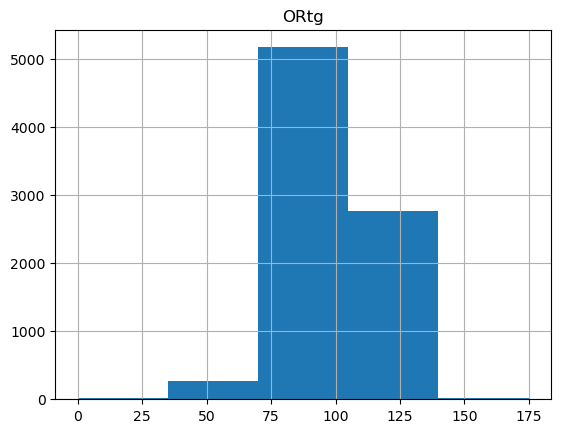

In [37]:
df.hist('ORtg', bins=5)

2024-04-01 19:00:43.596 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=1e-06)
2024-04-01 19:00:43.606 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2e-06)
2024-04-01 19:00:43.665 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=1e-06)
2024-04-01 19:00:43.820 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-06)
2024-04-01 19:00:43.922 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.0)
2024-04-01 19:00:43.948 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=1e-06)
2024-04-01 19:00:43.981 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=1.6e-05)
2024-04-01 19:00:44.232 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted burr distribution with erro

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,3.039986e-07,1789.076769,1817.149128,inf,0.022825,3.632516e-04
beta,3.280105e-07,1803.997956,1832.070314,inf,0.028915,1.994871e-06
gamma,8.717628e-07,1748.436803,1769.491072,inf,0.057685,2.629009e-24
chi2,8.718014e-07,1748.441556,1769.495825,inf,0.057678,2.662300e-24
lognorm,1.079299e-06,1762.449020,1783.503289,inf,0.045360,3.436117e-15


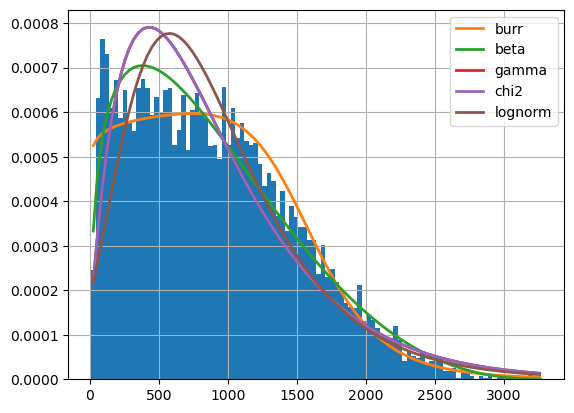

In [33]:
f = Fitter(df['Calc A'],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm", 'chi2', 'expon', 'exponpow'])
f.fit()
f.summary()

2024-04-01 19:02:23.358 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=4e-06)
2024-04-01 19:02:23.375 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=1e-06)
2024-04-01 19:02:23.581 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-06)
2024-04-01 19:02:23.757 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=1e-06)
2024-04-01 19:02:23.792 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=1e-06)
2024-04-01 19:02:23.839 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=2e-05)
2024-04-01 19:02:23.859 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=3.5e-05)
2024-04-01 19:02:24.090 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted burr distribution with er

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,5.688325e-07,1945.909827,1973.982185,inf,0.036527,5.317300e-10
chi2,8.875939e-07,1850.313285,1871.367554,inf,0.042396,2.525206e-13
gamma,9.508914e-07,1833.161071,1854.215340,inf,0.048737,1.801338e-17
norm,1.174874e-06,2125.651773,2139.687953,inf,0.060152,2.148020e-26
expon,4.019411e-06,1757.252601,1771.288780,inf,0.148966,2.711945e-160


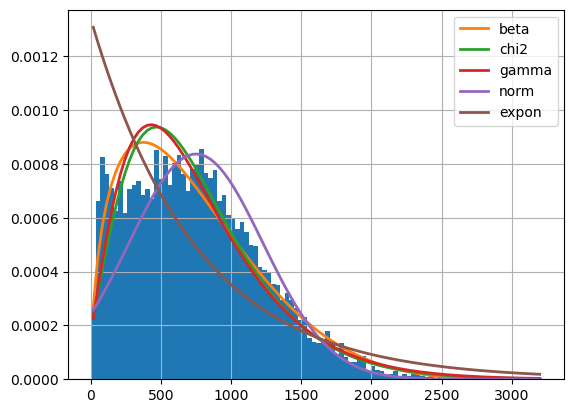

In [34]:
f = Fitter(df['Calc B'],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm", 'chi2', 'expon', 'exponpow'])
f.fit()
f.summary()

In [19]:
pd.set_option('display.max_rows', None)
df['Calc Overall_n1'].sort_values(ascending=True)

8777      149.76
579       161.70
5253      162.00
8779      164.30
8914      167.14
343       173.46
1446      183.12
9466      183.40
7076      186.18
3334      189.60
4319      195.94
4665      206.00
8176      210.38
6979      210.60
4135      210.80
8746      214.70
5395      216.00
1670      216.91
10402     225.42
6701      226.98
1830      228.36
3116      233.80
9961      234.21
5865      234.36
8570      236.00
7835      236.16
3117      236.91
303       242.06
6782      243.20
6097      246.40
8543      246.84
2758      248.04
9807      249.90
130       250.80
10780     252.08
8395      253.34
7635      254.22
5765      254.80
8999      255.00
5747      255.27
7102      256.47
5101      256.80
5127      258.94
1225      259.38
1211      259.84
8459      261.30
121       262.15
1037      264.60
9060      265.33
458       265.65
3306      266.42
925       266.70
9312      267.72
163       267.75
1174      267.93
1709      269.67
4902      270.22
1735      272.60
4134      273.

In [20]:
# Trying to flag red 
df_test1 = df[['games', 'games_started', 'player_type', 'KP_Conf_Dif', 'X.Poss',  'X.Min',
                 'ORtg', 'Contribution_n1', 'Year_dif', 'stl_per_poss', 
                'blk_per_poss', 'DR.', 'KP_Rk_Dif', 'Calc A', 'Team_AdjEM_dif', 
                'Calc B', 'Class', 'Pos_Ht', 'Ht', 'Wt', 'Calc_B_Contr']]

# Transfers ONLY
df_test1 = df_test1[df_test1['player_type']==0]
#'Team_AdjEM_dif', 'X.Min_n1', 'X.Poss_n1',
#df_test1 = df_test1[df_test1['player_type']==0]
columns = list(df_test1.columns)
columns.remove('Contribution_n1')
columns.remove('Calc_A_Contr')
#columns.remove('player_type')
keep_col = []
rem_columns = columns
check = True
accuracy_end = 0
while len(rem_columns)>0 and check == True:
    acc_check = 0

    for col in rem_columns:
        X = df_test1[keep_col + [col]]
    # X = df_test1[['player_type', 'X.Poss', 'X.Min', 'X.Min_n1', 'ORtg', 
    #                       'Year_dif', 'stl_per_poss', 'blk_per_poss', 
    #                       'DR.', 'KP_Rk_Dif', 'Calc A']]
        #y = df_test1[['Contribution_n1']]
        y = df_test1[['Contribution_n1']]
        # Model
        seed = 7
        test_size = 0.2
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
        model = XGBClassifier()
        model.fit(X_train, y_train)

        # Find Accuracy
        y_pred = model.predict(X_test)
        predictions = [round(value) for value in y_pred]
        accuracy = accuracy_score(y_test, predictions)
        print(keep_col + [col])
        print("Accuracy: ", accuracy * 100)
        if accuracy > acc_check:
            acc_check = accuracy
            col_to_add = col
            check = True
    #print("Adding: ", col_to_add)
    
    print("Rem Columns: ", rem_columns)
    #keep_col = keep_col + [col_to_add]
    if accuracy_end < acc_check:
        print("Adding: ", col_to_add)
        print("Rem Columns: ", rem_columns)
        accuracy_end = acc_check
        rem_columns.remove(col_to_add)
        keep_col = keep_col + [col_to_add]
    else:
        print("Fails", accuracy_end, acc_check)
        check = False
    print(keep_col)
    

KeyError: "['Calc_A_Contr'] not in index"

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier

df_test1 = df[['ws', 'dws', 'Calc Overall', 'KP_Conf_Dif', 'X.Poss',  
                   'Year_dif', 'stl_per_poss', 
                'blk_per_poss', 'DR.',  'Team_AdjEM_dif', 'player_type',
                 'Class', 'Pos_Ht', 'Ht', 'Wt', 'ORtg', 'X.Min', 'ows', 'Calc_Overall_n1_Contr']]
# 'games', 'games_started', 'Calc A', 'Calc B',
#df_test1 = df_test1[df_test1['player_type']==0]
# 'Calc Overall', 'Calc_Overall_Contr'
#'player_type', 'KP_Rk_Dif', 'ORtg', 'X.Min',
#'Team_AdjEM_dif', 'X.Min_n1', 'X.Poss_n1',
#df_test1 = df_test1[df_test1['player_type']==0]
columns = list(df_test1.columns)
#columns.remove('Contribution_n1')
#columns.remove('Calc_Overall_Contr')
columns.remove('Calc_Overall_n1_Contr')
#columns.remove('player_type')
#columns.remove('player_type')
keep_col = []
rem_columns = columns
check = True
accuracy_end = 0
while len(rem_columns)>0 and check == True:
    acc_check = 0

    for col in rem_columns:
        X = df_test1[keep_col + [col]]
    # X = df_test1[['player_type', 'X.Poss', 'X.Min', 'X.Min_n1', 'ORtg', 
    #                       'Year_dif', 'stl_per_poss', 'blk_per_poss', 
    #                       'DR.', 'KP_Rk_Dif', 'Calc A']]
        #y = df_test1[['Contribution_n1']]
        #y = df_test1[['Calc_Overall_Contr']]
        y = df_test1[['Calc_Overall_n1_Contr']]
        # Model
        seed = 7
        test_size = 0.1
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
        # Random Forrest
        # model = RandomForestClassifier()
        # model.fit(X_train, y_train)

        # Naive-Bayes
        # model = GaussianNB()
        # model.fit(X_train, y_train)

        # Nearest Neighbors
        # model = neighbors.KNeighborsClassifier()
        # model.fit(X_train, y_train)

        # Support Vector Machine
        # model = svm.SVC(kernel='linear')
        # model.fit(X_train, y_train)
        
        # Gradient Boosting Classifier
        model = GradientBoostingClassifier()
        model.fit(X_train, y_train)
    
        # Find Accuracy
        accuracy = model.score(X_test, y_test)
        # y_pred = model.predict(X_test)
        # predictions = [round(value) for value in y_pred]
        # accuracy = accuracy_score(y_test, predictions)
        print(keep_col + [col])
        print("Accuracy: ", accuracy * 100)
        if accuracy > acc_check:
            acc_check = accuracy
            col_to_add = col
            check = True
    #print("Adding: ", col_to_add)
    
    print("Rem Columns: ", rem_columns)
    #keep_col = keep_col + [col_to_add]
    if accuracy_end < acc_check:
        print("Adding: ", col_to_add)
        print("Rem Columns: ", rem_columns)
        accuracy_end = acc_check
        rem_columns.remove(col_to_add)
        keep_col = keep_col + [col_to_add]
    else:
        print("Fails", accuracy_end, acc_check)
        check = False
    print(keep_col)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ws']
Accuracy:  70.94430992736078


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['dws']
Accuracy:  68.8861985472155


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc Overall']
Accuracy:  68.76513317191282


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['KP_Conf_Dif']
Accuracy:  65.13317191283294


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['X.Poss']
Accuracy:  65.61743341404357


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Year_dif']
Accuracy:  65.85956416464892


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['stl_per_poss']
Accuracy:  65.73849878934624


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['blk_per_poss']
Accuracy:  65.61743341404357


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['DR.']
Accuracy:  66.10169491525424


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Team_AdjEM_dif']
Accuracy:  65.01210653753027


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['player_type']
Accuracy:  65.85956416464892


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Class']
Accuracy:  65.85956416464892


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Pos_Ht']
Accuracy:  65.85956416464892


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Ht']
Accuracy:  65.85956416464892


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Wt']
Accuracy:  65.61743341404357


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ORtg']
Accuracy:  65.73849878934624


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['X.Min']
Accuracy:  66.94915254237289


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows']
Accuracy:  72.76029055690073
Rem Columns:  ['ws', 'dws', 'Calc Overall', 'KP_Conf_Dif', 'X.Poss', 'Year_dif', 'stl_per_poss', 'blk_per_poss', 'DR.', 'Team_AdjEM_dif', 'player_type', 'Class', 'Pos_Ht', 'Ht', 'Wt', 'ORtg', 'X.Min', 'ows']
Adding:  ows
Rem Columns:  ['ws', 'dws', 'Calc Overall', 'KP_Conf_Dif', 'X.Poss', 'Year_dif', 'stl_per_poss', 'blk_per_poss', 'DR.', 'Team_AdjEM_dif', 'player_type', 'Class', 'Pos_Ht', 'Ht', 'Wt', 'ORtg', 'X.Min', 'ows']
['ows']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows', 'ws']
Accuracy:  70.8232445520581


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows', 'dws']
Accuracy:  71.06537530266344


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows', 'Calc Overall']
Accuracy:  71.42857142857143


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows', 'KP_Conf_Dif']
Accuracy:  71.1864406779661


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows', 'X.Poss']
Accuracy:  71.06537530266344


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows', 'Year_dif']
Accuracy:  71.91283292978208


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows', 'stl_per_poss']
Accuracy:  71.42857142857143


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows', 'blk_per_poss']
Accuracy:  71.91283292978208


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows', 'DR.']
Accuracy:  72.5181598062954


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows', 'Team_AdjEM_dif']
Accuracy:  71.30750605326877


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows', 'player_type']
Accuracy:  72.03389830508475


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows', 'Class']
Accuracy:  71.67070217917676


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows', 'Pos_Ht']
Accuracy:  72.63922518159806


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows', 'Ht']
Accuracy:  72.27602905569007


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows', 'Wt']
Accuracy:  71.5496368038741


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows', 'ORtg']
Accuracy:  72.39709443099274


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ows', 'X.Min']
Accuracy:  71.5496368038741
Rem Columns:  ['ws', 'dws', 'Calc Overall', 'KP_Conf_Dif', 'X.Poss', 'Year_dif', 'stl_per_poss', 'blk_per_poss', 'DR.', 'Team_AdjEM_dif', 'player_type', 'Class', 'Pos_Ht', 'Ht', 'Wt', 'ORtg', 'X.Min']
Fails 0.7276029055690073 0.7263922518159807
['ows']


In [ ]:
newer = pd.DataFrame(zip(df.games, df['X.Poss']), columns=['Ht', 'X.Poss'])
newer

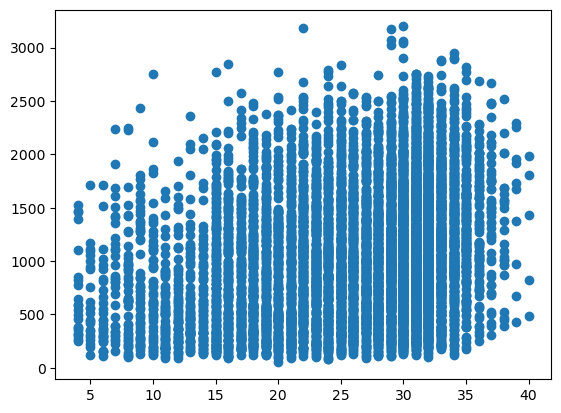

In [23]:
plt.scatter(df['games'], df['Calc A_n1'])
plt.show()

In [ ]:
df[df['games']<10].sort_values(by='X.Poss_n1', ascending=False)

In [25]:
pd.set_option('display.max_columns', None)
df[(df['games']>40)]
    #& (df['year']==2022)]
#pd.options.display.max_columns
    # & (df['year']=='2023')) | ((df['games_n1']>39) & (df['year_n1']=='2023'))]
   # | 
#    ((df['games']>40) & (df['year']==2022)) | ((df['games_n1']>40) & (df['year_n1']==2022)) | 
#    ((df['games']>33) & (df['year']==2021)) | ((df['games_n1']>33) & (df['year_n1']==2021)) | 
#    ((df['games']>35) & (df['year']==2020)) | ((df['games_n1']>35) & (df['year_n1']==2020)) | 
#    ((df['games']>40) & (df['year']==2019)) | ((df['games_n1']>40) & (df['year_n1']==2019))]

,Unnamed: 0,player_type,Team,Team_n1,Unnamed..0_x,Player.Name,season,conf_abbr,games,games_started,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg2_per_g,fg2a_per_g,fg2_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,sos,mp,fg,fga,fg2,fg2a,fg2_pct.1,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_per_min,fga_per_min,fg2_per_min,fg2a_per_min,fg3_per_min,fg3a_per_min,ft_per_min,fta_per_min,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min,fg_per_poss,fga_per_poss,fg2_per_poss,fg2a_per_poss,fg3_per_poss,fg3a_per_poss,ft_per_poss,fta_per_poss,trb_per_poss,ast_per_poss,stl_per_poss,blk_per_poss,tov_per_poss,pf_per_poss,pts_per_poss,off_rtg,def_rtg,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,year,Ht,Wt,Yr,G,S,X.Min,ORtg,X.Poss,X.Shots,eFG.,TS.,OR.,DR.,ARate,TORate,Blk.,Stl.,FC.40,FD.40,FTRate,FTM.A,Pct,X2PM.A,Pct.1,X3PM.A,Pct.2,X.Pct,X.2PM.A,X.Pct.1,Unnamed..0_x_n1,Player.Name_n1,season_n1,conf_abbr_n1,games_n1,games_started_n1,mp_per_g_n1,fg_per_g_n1,fga_per_g_n1,fg_pct_n1,fg2_per_g_n1,fg2a_per_g_n1,fg2_pct_n1,fg3_per_g_n1,fg3a_per_g_n1,fg3_pct_n1,ft_per_g_n1,fta_per_g_n1,ft_pct_n1,orb_per_g_n1,drb_per_g_n1,trb_per_g_n1,ast_per_g_n1,stl_per_g_n1,blk_per_g_n1,tov_per_g_n1,pf_per_g_n1,pts_per_g_n1,sos_n1,mp_n1,fg_n1,fga_n1,fg2_n1,fg2a_n1,fg2_pct.1_n1,fg3_n1,fg3a_n1,ft_n1,fta_n1,orb_n1,drb_n1,trb_n1,ast_n1,stl_n1,blk_n1,tov_n1,pf_n1,pts_n1,fg_per_min_n1,fga_per_min_n1,fg2_per_min_n1,fg2a_per_min_n1,fg3_per_min_n1,fg3a_per_min_n1,ft_per_min_n1,fta_per_min_n1,trb_per_min_n1,ast_per_min_n1,stl_per_min_n1,blk_per_min_n1,tov_per_min_n1,pf_per_min_n1,pts_per_min_n1,fg_per_poss_n1,fga_per_poss_n1,fg2_per_poss_n1,fg2a_per_poss_n1,fg3_per_poss_n1,fg3a_per_poss_n1,ft_per_poss_n1,fta_per_poss_n1,trb_per_poss_n1,ast_per_poss_n1,stl_per_poss_n1,blk_per_poss_n1,tov_per_poss_n1,pf_per_poss_n1,pts_per_poss_n1,off_rtg_n1,def_rtg_n1,per_n1,ts_pct_n1,efg_pct_n1,fg3a_per_fga_pct_n1,fta_per_fga_pct_n1,pprod_n1,orb_pct_n1,drb_pct_n1,trb_pct_n1,ast_pct_n1,stl_pct_n1,blk_pct_n1,tov_pct_n1,usg_pct_n1,ows_n1,dws_n1,ws_n1,ws_per_40_n1,obpm_n1,dbpm_n1,bpm_n1,year_n1,Ht_n1,Wt_n1,Yr_n1,G_n1,S_n1,X.Min_n1,ORtg_n1,X.Poss_n1,X.Shots_n1,eFG._n1,TS._n1,OR._n1,DR._n1,ARate_n1,TORate_n1,Blk._n1,Stl._n1,FC.40_n1,FD.40_n1,FTRate_n1,FTM.A_n1,Pct_n1,X2PM.A_n1,Pct.1_n1,X3PM.A_n1,Pct.2_n1,X.Pct_n1,X.2PM.A_n1,X.Pct.1_n1,Season_x,TeamName_x,TeamName 2_x,Tempo_x,RankTempo_x,AdjTempo_x,RankAdjTempo_x,OE_x,RankOE_x,AdjOE_x,RankAdjOE_x,DE_x,RankDE_x,AdjDE_x,RankAdjDE_x,AdjEM_x,RankAdjEM_x,seed_x,Season_y,TeamName_y,TeamName 2_y,Tempo_y,RankTempo_y,AdjTempo_y,RankAdjTempo_y,OE_y,RankOE_y,AdjOE_y,RankAdjOE_y,DE_y,RankDE_y,AdjDE_y,RankAdjDE_y,AdjEM_y,RankAdjEM_y,seed_y,Season,TeamName,TeamName 2,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,seed,Year_Conf_x,Conf_Abb_x,Conf_Rk_x,Conf_Full_x,Conf_Rating_x,Year_Conf_y,Conf_Abb_y,Conf_Rk_y,Conf_Full_y,Conf_Rating_y,Year_Conf,Conf_Abb,Conf_Rk,Conf_Full,Conf_Rating,Contribution_n1,Class,Pos_Ht,Year_dif,Team_AdjEM_dif,KP_Rk_Dif,KP_Conf_Dif,Calc A,Calc A_n1,Calc B,Calc B_n1,Calc Overall,Calc Overall_n1,Calc_Overall_Contr


In [26]:
print(df['year'].dtype)

float64
